## Predviđanje kobnosti srčanog zatajenja

### Uvoz potrebnih biblioteka

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Učitavanje podataka

In [3]:
df = pd.read_csv('dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Eksploarativna analiza podataka

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

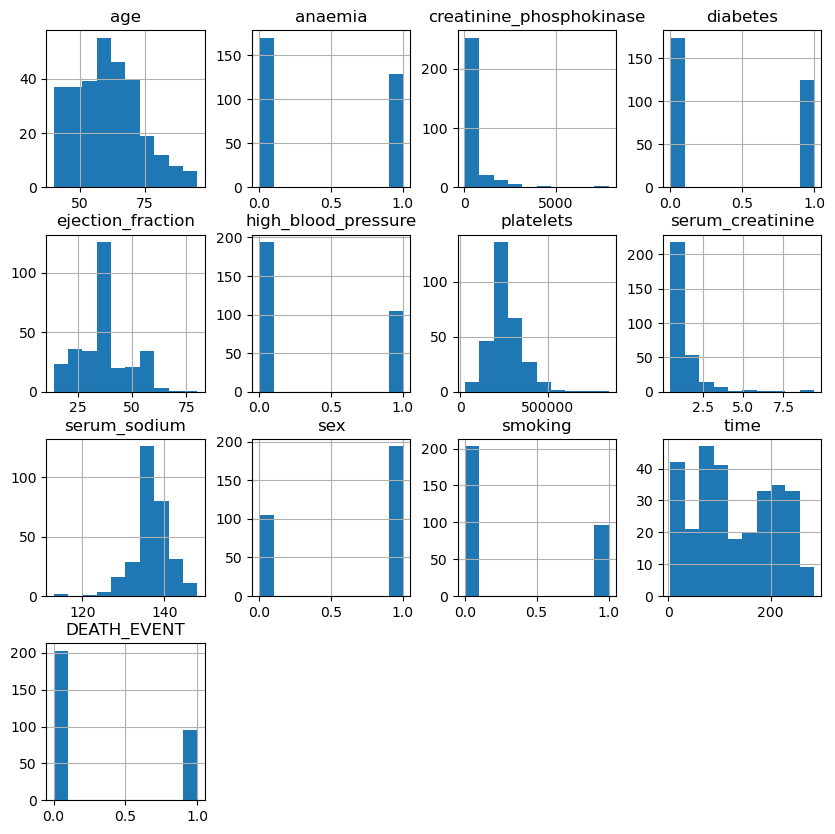

In [6]:
df.hist(figsize=(10,10))

<Axes: >

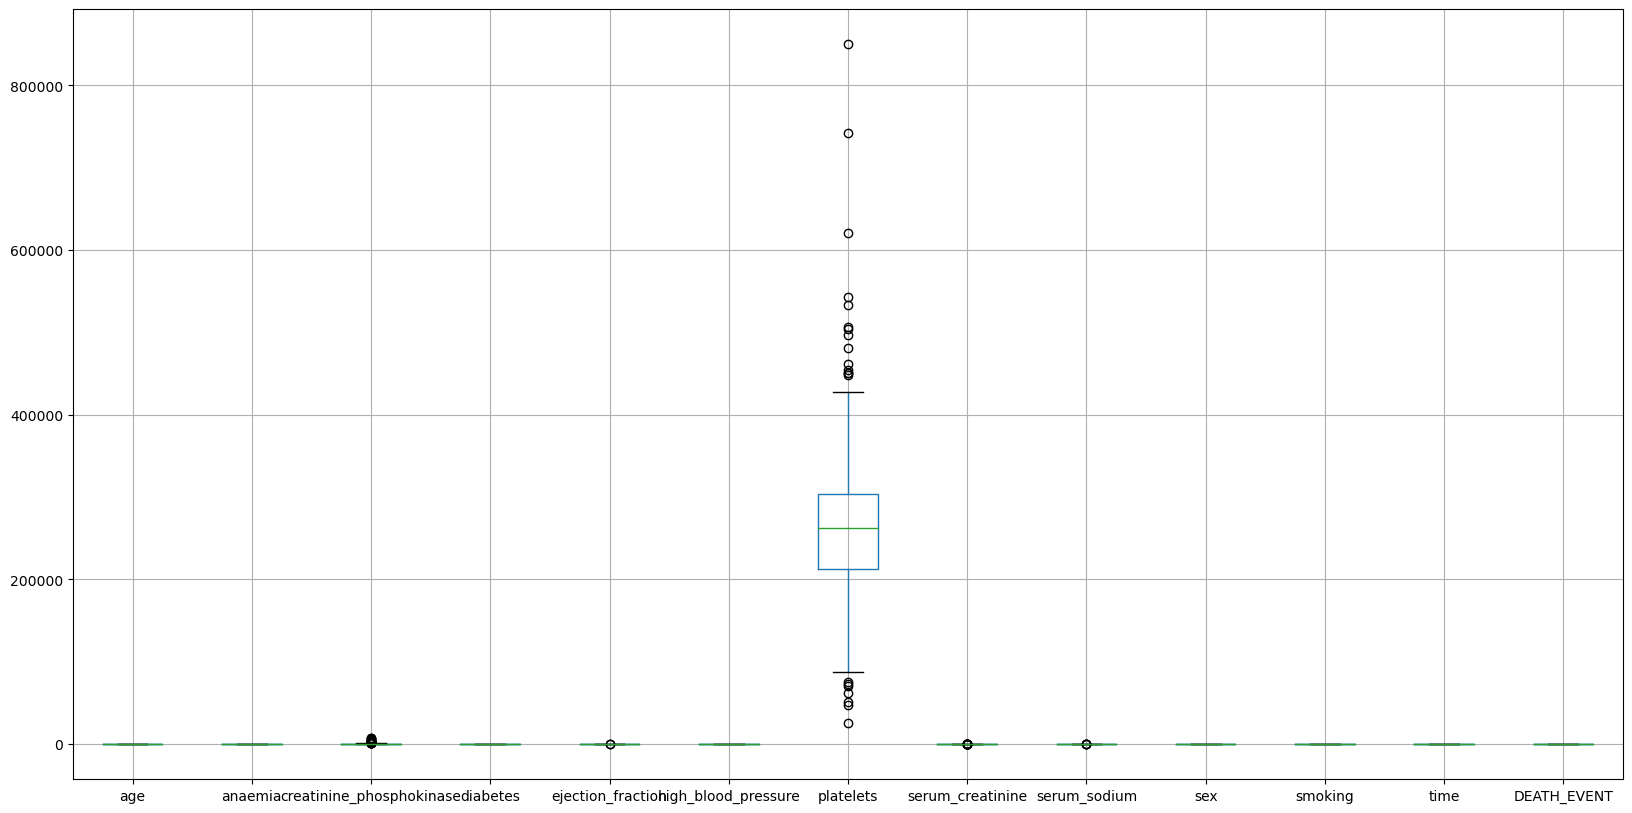

In [7]:
df.boxplot(figsize=(20,10))

<Axes: >

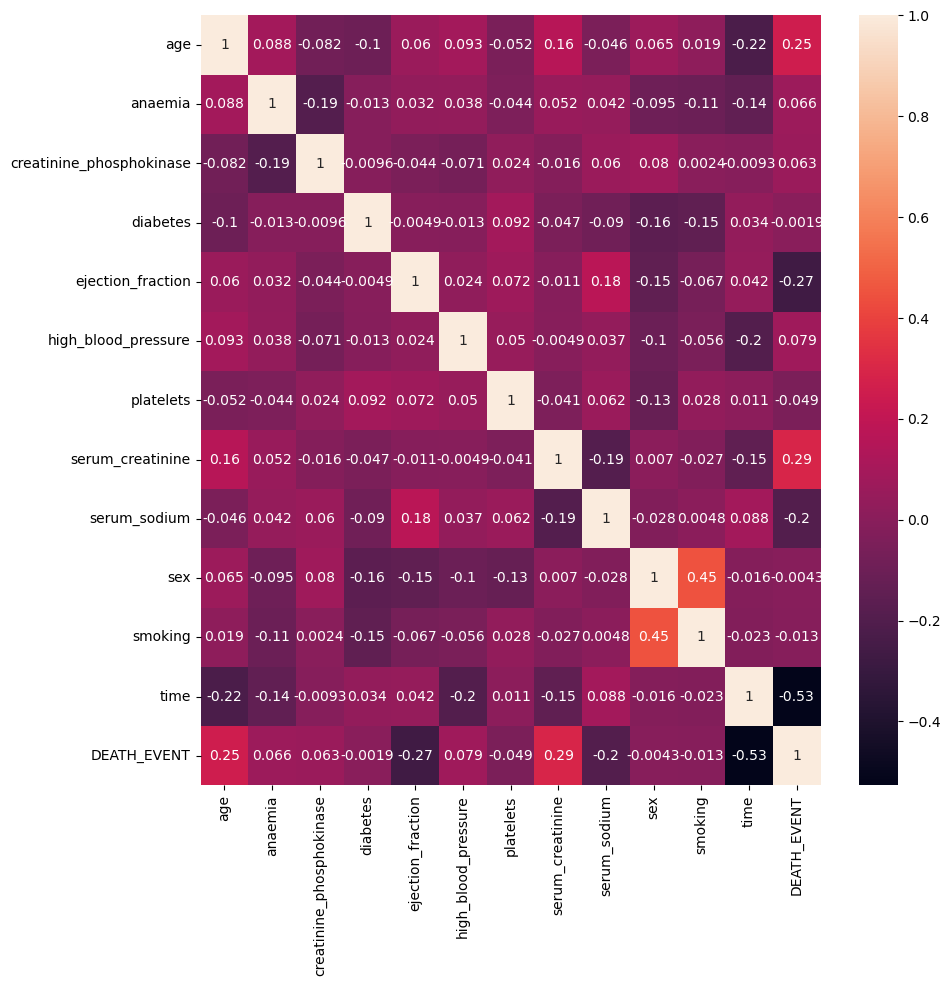

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### Priprema podataka

In [9]:
df['creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'] + 1)
df['serum_creatinine'] = np.log(df['serum_creatinine'] + 1)
df['platelets'] = np.log(df['platelets'] + 1)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

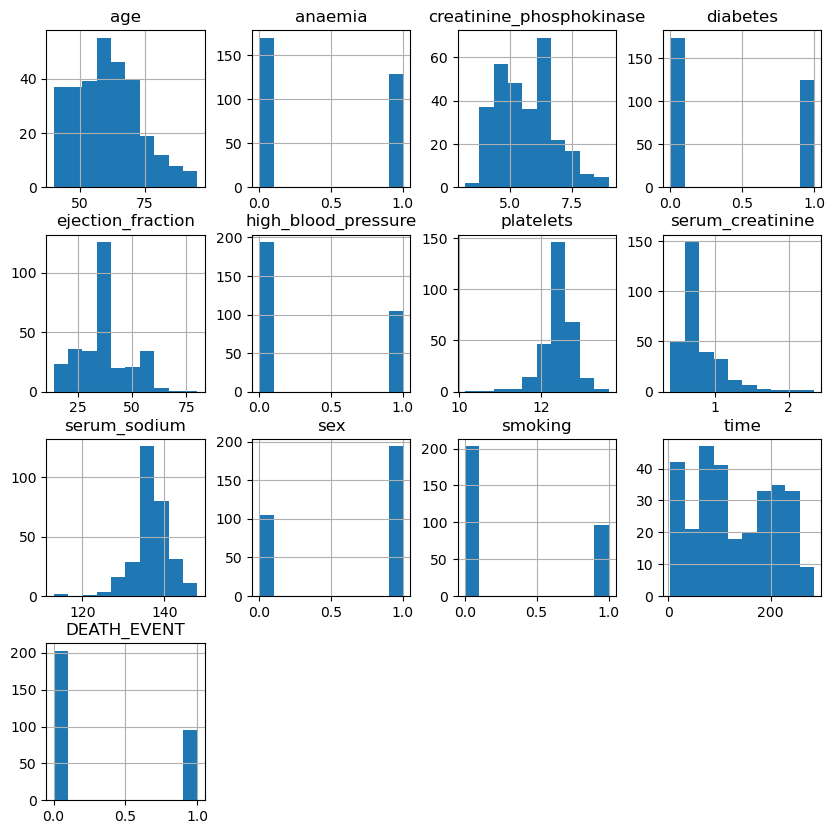

In [10]:
df.hist(figsize=(10,10))

<Axes: >

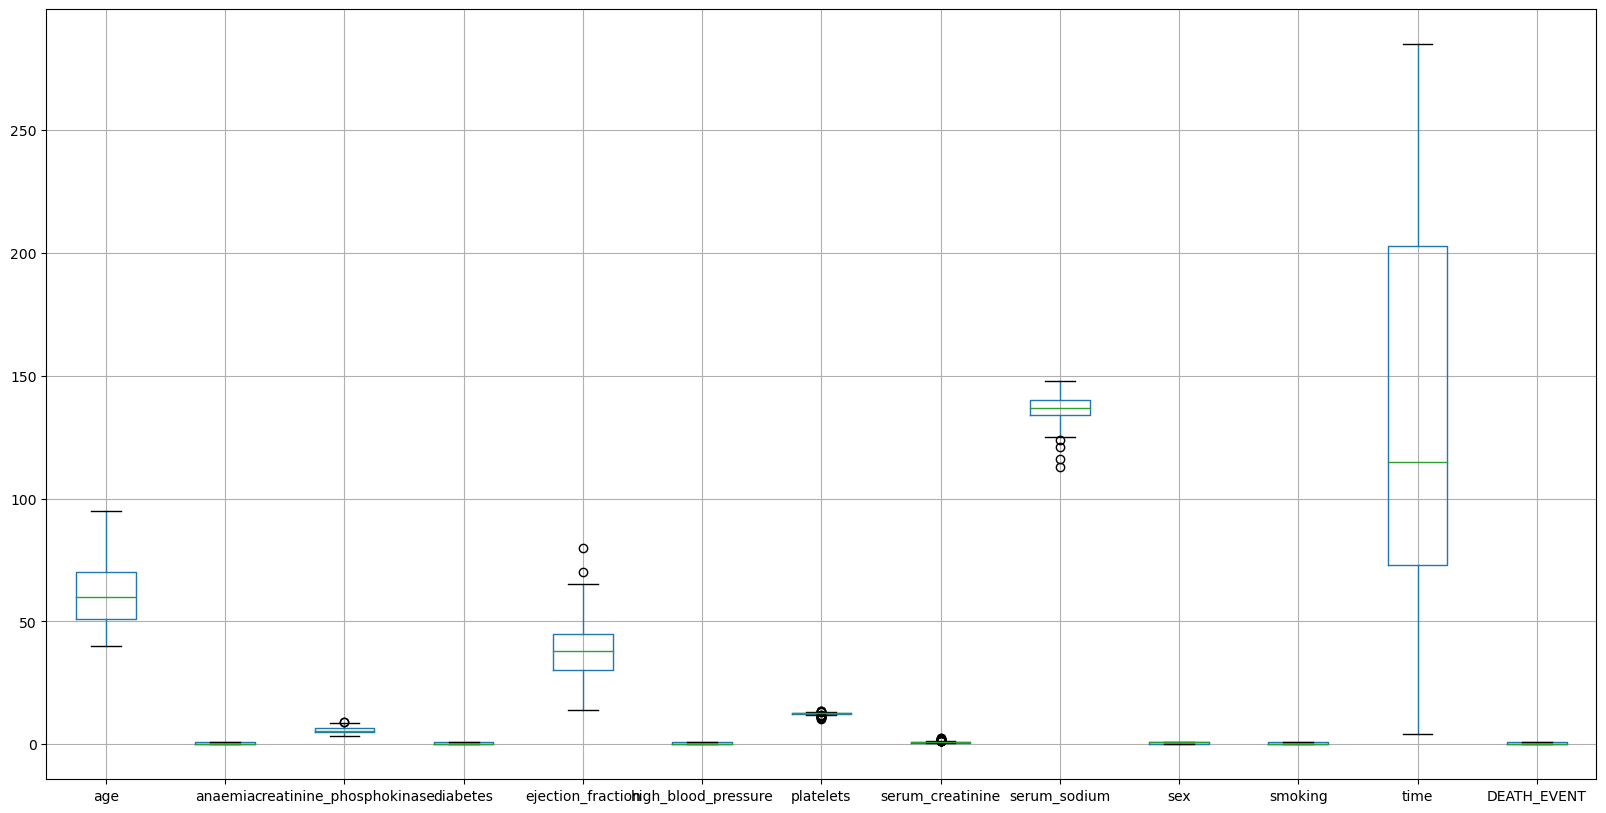

In [11]:
df.boxplot(figsize=(20,10))

<Axes: >

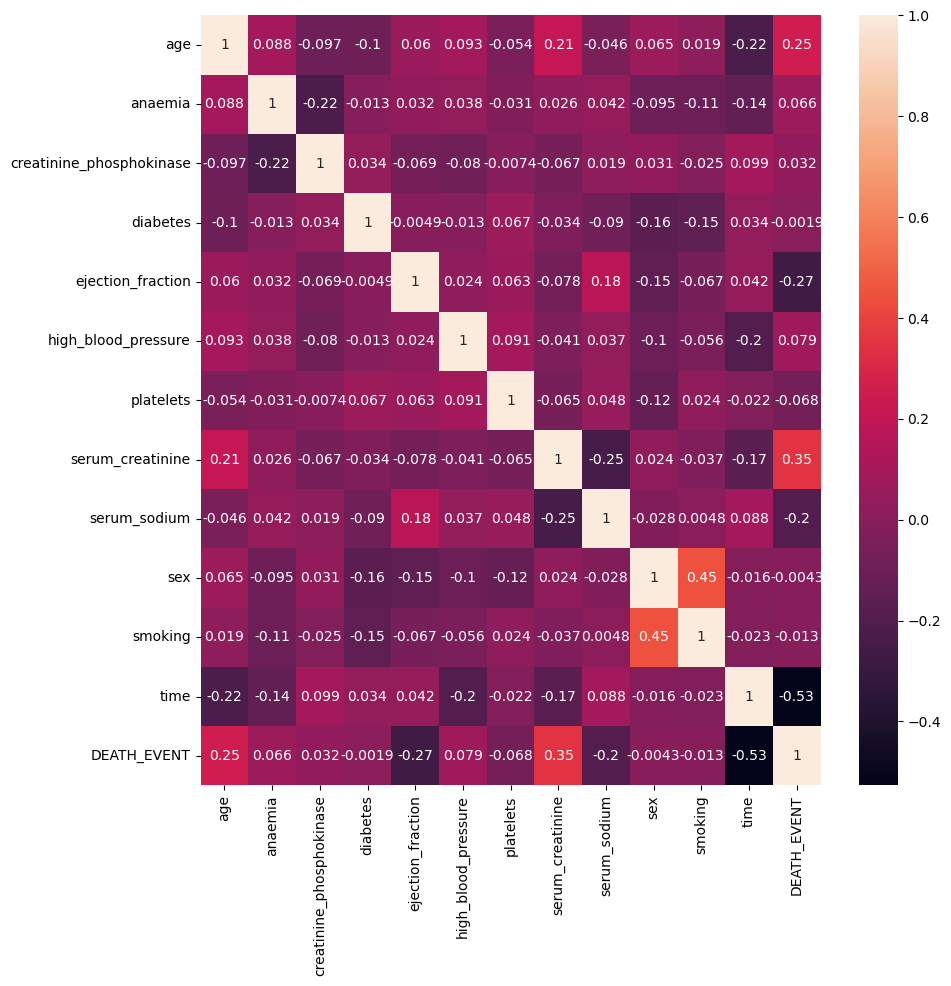

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### Stablo odlučivanja

In [13]:
y = df['DEATH_EVENT']
x = df.drop(['DEATH_EVENT'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.25, stratify=y)
x_train.shape, y_train.shape

((224, 12), (224,))

In [16]:
y_train.value_counts(normalize=True)

DEATH_EVENT
0    0.678571
1    0.321429
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

DEATH_EVENT
0    0.68
1    0.32
Name: proportion, dtype: float64

In [18]:
decision_tree = DecisionTreeClassifier(random_state=10)

In [19]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [24]:
y_predict = decision_tree.predict(x_test)

In [20]:
decision_tree.score(x_train, y_train)

1.0

In [21]:
decision_tree.score(x_test, y_test)

0.7733333333333333

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('Accuracy:',accuracy_score(y_test, y_predict))
print('Precision:',precision_score(y_test, y_predict, average='weighted'))

Accuracy: 0.7733333333333333
Precision: 0.8344807965860597


#### Namještanje parametara

In [28]:
train_accuracy = []
valid_accuracy = []

for depth in range(1,10):
    new_dt = DecisionTreeClassifier(random_state=10, max_depth=depth)
    new_dt.fit(x_train, y_train)
    train_accuracy.append(new_dt.score(x_train, y_train))
    valid_accuracy.append(new_dt.score(x_test, y_test))

depth_df = pd.DataFrame({'max_depth':range(1,10), 'train_accuracy':train_accuracy, 'validation_accuracy':valid_accuracy})
depth_df

,max_depth,train_accuracy,validation_accuracy
0,1,0.839286,0.866667
1,2,0.843750,0.813333
2,3,0.879464,0.813333
3,4,0.924107,0.773333
4,5,0.964286,0.786667
5,6,0.982143,0.800000
6,7,0.995536,0.786667
7,8,1.000000,0.773333
8,9,1.000000,0.773333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


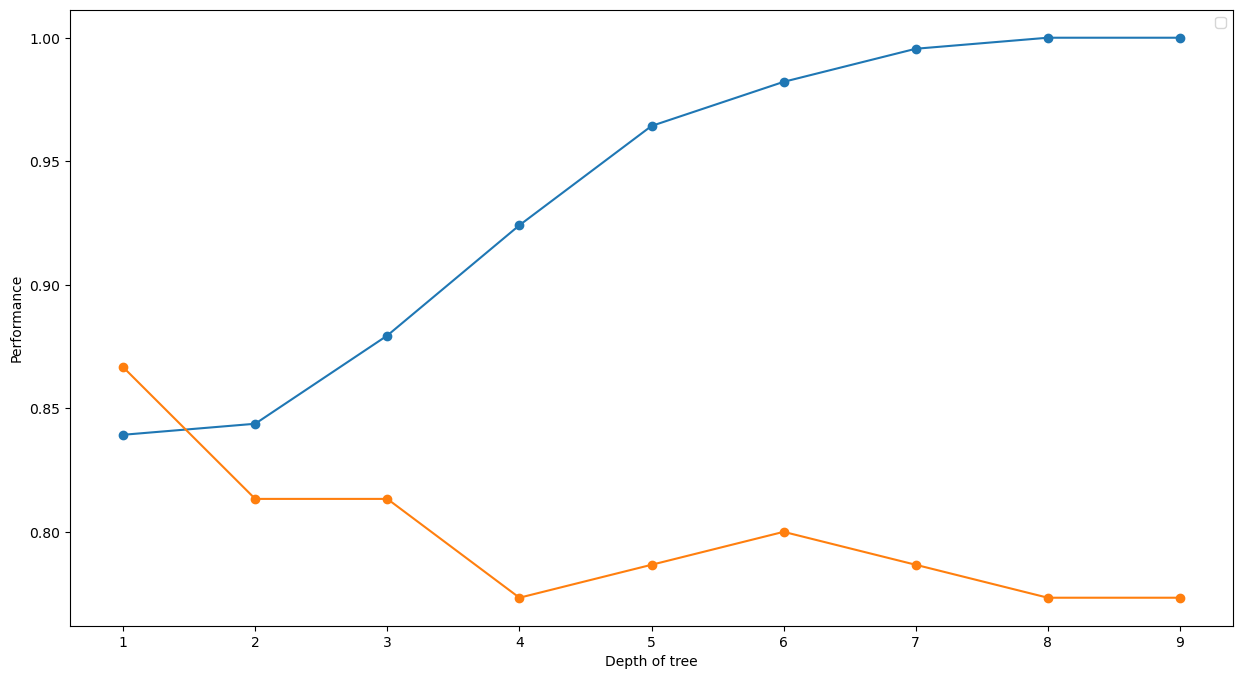

In [33]:
plt.figure(figsize=(15,8))
plt.plot(depth_df['max_depth'], depth_df['train_accuracy'], marker='o')
plt.plot(depth_df['max_depth'], depth_df['validation_accuracy'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [37]:
train_accuracy_leaf = []
valid_accuracy_leaf = []

for leaf in range(2,25):
    new_dt = DecisionTreeClassifier(random_state=10, max_leaf_nodes=leaf)
    new_dt.fit(x_train, y_train)
    train_accuracy_leaf.append(new_dt.score(x_train, y_train))
    valid_accuracy_leaf.append(new_dt.score(x_test, y_test))

leaf_df = pd.DataFrame({'max_depth':range(2,25), 'train_accuracy':train_accuracy_leaf, 'validation_accuracy':valid_accuracy_leaf})
leaf_df

,max_depth,train_accuracy,validation_accuracy
0,2,0.839286,0.866667
1,3,0.843750,0.813333
2,4,0.875000,0.826667
3,5,0.875000,0.826667
4,6,0.883929,0.826667
5,7,0.897321,0.826667
6,8,0.897321,0.826667
7,9,0.901786,0.813333
8,10,0.919643,0.826667
9,11,0.924107,0.773333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


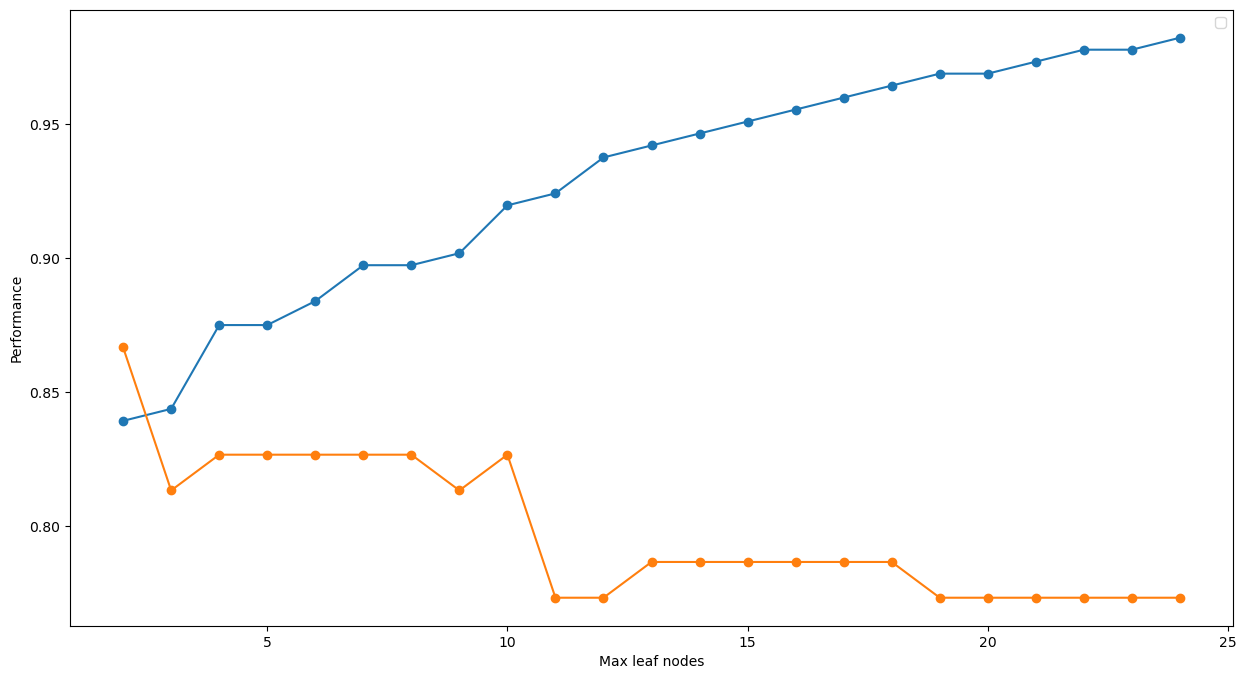

In [38]:
plt.figure(figsize=(15,8))
plt.plot(leaf_df['max_depth'], leaf_df['train_accuracy'], marker='o')
plt.plot(leaf_df['max_depth'], leaf_df['validation_accuracy'], marker='o')
plt.xlabel('Max leaf nodes')
plt.ylabel('Performance')
plt.legend()

In [39]:
dt = DecisionTreeClassifier(random_state=10, max_depth=6, max_leaf_nodes=10)

In [40]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=10)

In [41]:
y_predict = dt.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_predict))
print('Precision:',precision_score(y_test, y_predict, average='weighted'))

Accuracy: 0.8266666666666667
Precision: 0.841559220389805


### Support vector machine